In [9]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from keras.datasets import mnist
sns.set_theme()

In [ ]:
from cnn import Sequential 
from cnn.layers import Linear, ReLU, Softmax, Flatten
from cnn.loss import CrossEntropyLoss
from cnn.optim import Adam
from cnn.utils import train_val_test_split, train_val, plot_training_metrics, test

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

X = X #/ 255.0 


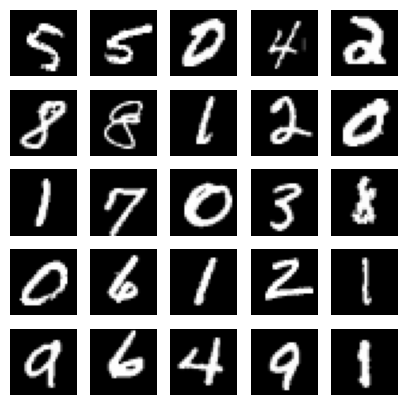

In [12]:
r = 5 
indexes = np.random.randint(0, x_train.shape[0], size=r ** 2)
images = X[indexes]
labels = y_train[indexes]

plt.figure(figsize=(r,r))
for i in range(len(indexes)):
    plt.subplot(r, r, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

In [14]:
X_train.shape, X_val.shape, X_test.shape

((49000, 28, 28), (10500, 28, 28), (10500, 28, 28))

In [15]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val= X_val.reshape(X_val.shape[0], -1)

In [16]:
ordered_layers = [
      #Flatten(),
      Linear(784, 256),
      ReLU(),
      Linear(256, 64),
      ReLU(),
      Linear(64, 10),
      Softmax()
    ]

loss = CrossEntropyLoss()
optim = Adam()
model = Sequential(
  layers=ordered_layers,
  loss_func = loss,
  optimizer = optim
)

EPOCHS = 100
batch_size = 32
train_losses, train_accuracies, val_losses, val_accuracies = train_val(model, X_train, y_train, X_val, y_val, epochs=EPOCHS, verbose_freq = 1)

Epoch 1, Train Loss: 14.313529, Train Accuracy: 0.111959, Val Loss: 14.268352, Val Accuracy: 0.114762


KeyboardInterrupt: 